# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [2]:
# import standard libraries
import numpy as np # поддерживает большие многомерные массивы и матрицы, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами
import pandas as pd # Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные»
import matplotlib.pyplot as plt # визуализация, построение графико
import seaborn as sns #это библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.
from scipy import stats #scipy - это набор удобных функций, построенных на NumPy и математических алгоритмах 
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics #для подготовки данных, преобразования,Уменьшение размерности и т.д.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import warnings #Предупреждающие сообщения обычно выдаются в ситуациях, когда полезно предупредить пользователя о каком-либо состоянии в программе, когда это условие (обычно) не требует создания исключения и завершения программы. Например, может потребоваться выдать предупреждение, когда программа использует устаревший модуль.
warnings.filterwarnings('ignore')


* ### Read data from ‘.csv’ file

In [3]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [4]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Dataset consist of 4898 rows and 12 columns.

has 2 datatypes: float64(11), integer64(1)

has no missing values

* ### Head

In [5]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Задача классифицировать вина на плохие и хорошие. Атрибута "Y" подобного нет, четкого отета нет. Но есть атрибут "quality", который отечает за оценку качеста вина и из, которого мы можем создать атрибут "Y" с ответом для обучения модели. Атрибут "quality" содержит значения от 3 до 9 (посмотрела в CSV файле), где 3 "Not Good" и 9 - "Good", соответстенно чем выше число тем качество вина выше.

* ### Encoding 'quality' attribute

In [7]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset['quality'] = dataset.quality.apply(lambda q: 0 if q <=6 else 1)

In [8]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [9]:
print ('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print ('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')
dataset['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

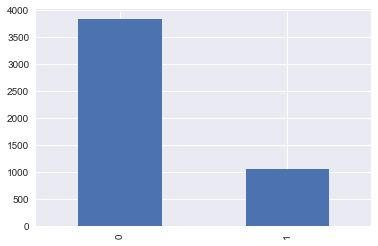

In [10]:
# visualisation plotby bar 
dataset['quality'].value_counts().plot(x = dataset['quality'], kind='bar')

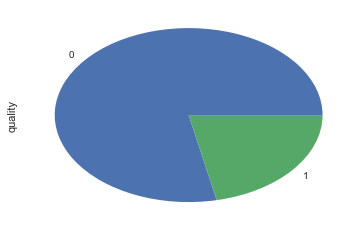

In [11]:
# visualisation plot by pie
dataset['quality'].value_counts().plot(x = dataset['quality'], kind = 'pie')

There are 78.36 % of "Not good" quality wines an only 21.64 % of "Good" quality wines in our dataset. So we can see that the dataset is imbalanced.

* ### Resampling of an imbalanced dataset

In [12]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()


# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

# Initialisation of target

Random under-sampling:
1    1060
0    1060
Name: quality, dtype: int64


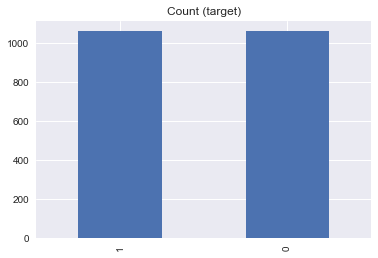

In [13]:
class_0_under = class_0.sample(count_class_1)
dataset_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(dataset_under.quality.value_counts())

dataset_under.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [14]:
#initialisation of target
target = dataset['quality']

* ### Drop column 'quality'

In [15]:
dataset = dataset.drop(['quality'],axis = 1)

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [16]:
# StandardScaler 
sc = StandardScaler()

dataset_sc = sc.fit_transform(dataset)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### Creating datasets for ML part

In [17]:
# set 'X' for features' and y' for the target ('quality').
y = target
X = dataset_sc.copy()

# for under-sampling dataset 


# for over-sampling dataset 


In [18]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### 'Train\Test' split

In [19]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [21]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((980, 11), (980,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [22]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [23]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
              precision    recall  f1-score   support

          0   0.815611  0.943717  0.875000       764
          1   0.552083  0.245370  0.339744       216

avg / total   0.757527  0.789796  0.757025       980

KNN Classification Report: 
              precision    recall  f1-score   support

          0   0.873918  0.925393  0.898919       764
          1   0.666667  0.527778  0.589147       216

avg / total   0.828238  0.837755  0.830643       980

DT Classification Report: 
              precision    recall  f1-score   support

          0   0.897040  0.912304  0.904607       764
          1   0.669951  0.629630  0.649165       216

avg / total   0.846988  0.850000  0.848306       980



* ### Confusion matrix

In [24]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[721  43]
 [163  53]]

KNN Confusion Matrix: 
 [[707  57]
 [102 114]]

DT Confusion Matrix: 
 [[697  67]
 [ 80 136]]



* ### ROC-AUC score

In [25]:
roc_auc_score(DT_pred, y_test)

0.78349531797807659

* ### Build, train and evaluate models with hyperparameters

In [26]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)


In [27]:
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)

K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}


In [28]:
# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [29]:
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Decision Tree Best Hyper Parameters:          {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}


In [30]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,4,5,6,7,8,9,10], 'penalty':['elasticnet', 'l1', 'l2', 'none'], 'solver':['saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)



In [31]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_score_)



Logistic Regression Best Hyper Parameters:    0.803981623277


* ### Classification report

In [32]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))

LR Classification Report: 
              precision    recall  f1-score   support

          0   0.815819  0.945026  0.875682       764
          1   0.557895  0.245370  0.340836       216

avg / total   0.758971  0.790816  0.757798       980



In [33]:
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))

KNN Classification Report: 
              precision    recall  f1-score   support

          0   0.873918  0.925393  0.898919       764
          1   0.666667  0.527778  0.589147       216

avg / total   0.828238  0.837755  0.830643       980



In [34]:
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

DT Classification Report: 
              precision    recall  f1-score   support

          0   0.866093  0.922775  0.893536       764
          1   0.644578  0.495370  0.560209       216

avg / total   0.817270  0.828571  0.820068       980



* ### Confusion matrix

DT Confusion Matrix


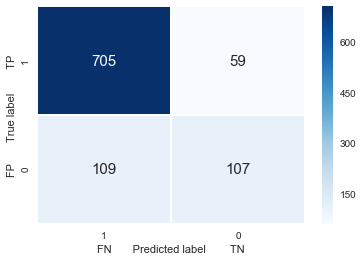

In [35]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

KNN Confusion Matrix


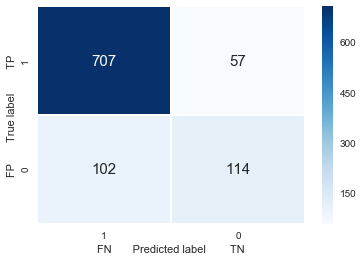

In [36]:
# confusion matrix of KNN model
KNN_confusion_mx = confusion_matrix(y_test, KNN1_pred)
print('KNN Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [37]:
roc_auc_score(DT1_pred, y_test)


0.75533583967318907

In [38]:
roc_auc_score(KNN1_pred, y_test)

0.77029254223320964

In [39]:
roc_auc_score(LR1_pred, y_test)

0.68685697294082648

##  Conclusion.

In [40]:
# submission of .csv file with predictions
# Для начала, нам нет необходимости подбора по гиперпараметрам, т.к. предсказания не улучшают.
# Соответстенно в несбалансированнх данных выигрыает DT (дерево решенений), т.е. дает наилучшее предсказание

sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT_pred
sub.to_csv('WinePredictionsTestUnbalanceatasetHomeWork.csv', index=False)